# 데이터 살펴보기

100%|██████████| 170498071/170498071 [00:13<00:00, 12732637.49it/s]


Extracting ./cifar-10-python.tar.gz to ./


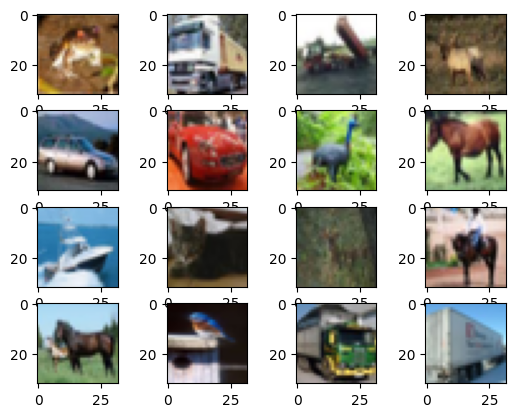

In [ ]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# ❶ CIFAR10 데이터셋을 불러옴

training_data = CIFAR10( #train data 마련
    root="./", 
    train=True,
    download=True, 
    transform=ToTensor())



for i in range(16):
   plt.subplot(4, 4, i+1)
   #plt.title("class:"+ class_name[training_data.targets[i]])
   plt.imshow(training_data.data[i]) #이미지 출력을 위한 부분
plt.show()

# 데이터 전처리에 크롭핑과 뒤집기를 추가

In [ ]:
12

12

Files already downloaded and verified
Files already downloaded and verified


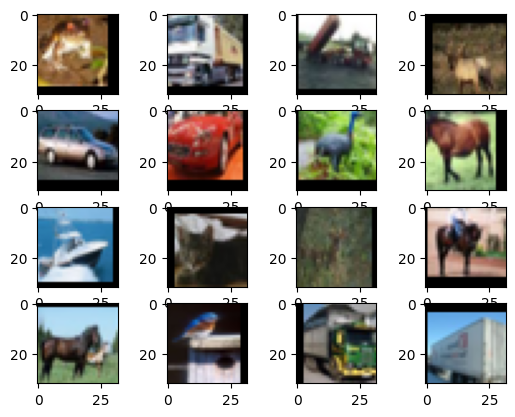

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T


from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ # ❶ 데이터 전처리 함수들 : transforms 객체
   T.ToPILImage(), #이미지 변환 자유자재 : 텐서를 다시 이미지로 변환
   RandomCrop((32, 32), padding=4), # ➋ 랜덤으로 이미지 일부 제거 후 패딩 : 이미지 중앙에 있지 않더라도 개체를 인식하는 방법을 학습하고 과적합을 방지
   RandomHorizontalFlip(p=0.5),     # ➌ y축으로 기준으로 대칭 (VirticalFlip : X축 대칭), 50
])

training_data = CIFAR10(
    root="./", 
    train=True, 
    download=True, 
    transform=transforms) # transform에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root="./", 
    train=False, 
    download=True, 
    transform=transforms)

for i in range(16):
   plt.subplot(4, 4, i+1)
   plt.imshow(transforms(training_data.data[i])) #원래 이미지가 아닌 이미지 변환 적용
plt.show()

# 데이터 전처리에 정규화를 추가

Files already downloaded and verified
Files already downloaded and verified


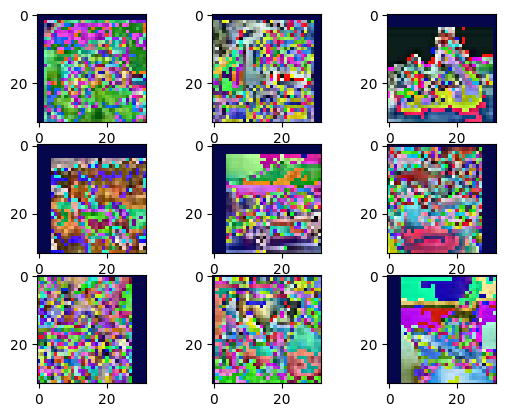

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([
   T.ToPILImage(), 
   RandomCrop((32, 32), padding=4),
   RandomHorizontalFlip(p=0.5),#50%확률로 좌우로 뒤집음. 과적합 방지.
   T.ToTensor(),
   # ➊ 데이터 정규화 - 학습에는 필요 없다. : 평균 0, 단위분산 없도록함. 이는 모델의 매개변수를 더 쉽게 최적화하고 이미지 간의 밝기 또는 대비 차이의 영향을 줄여 훈련 중에 신경망 모델의 성능을 향상
   # 표준화와 같은 데이터 정규화 기술은 모든 기능이 동일한 척도를 갖도록 하고 데이터를 단위 분산에 더 가깝게 만드는 데 자주 사용
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
   T.ToPILImage()
])

training_data = CIFAR10(
    root="./", 
    train=True, 
    download=True, 
    transform=transforms)
test_data = CIFAR10(
    root="./", 
    train=False, 
    download=True, 
    transform=transforms)

for i in range(9):
   plt.subplot(3, 3, i+1)
   plt.imshow(transforms(training_data.data[i]))
plt.show()

# 데이터셋의 평균과 표준편차

In [ ]:
import torch

training_data = CIFAR10(
    root="./", 
    train=True, 
    download=True, 
    transform=ToTensor())

# item[0]은 이미지, item[1]은 정답 레이블 - 리스트 형태로 각각의 이미지를 쌓음
imgs = [item[0] for item in training_data]

# ❶imgs를 하나로 합침 - 샘플 단위 기준으로 쌓음 : (N, C, H, W)' 모양의 단일 텐서를 생성. 여기서 N은 샘플 수, C는 채널 수, H와 W는 각각 이미지의 높이와 너비
imgs = torch.stack(imgs, dim=0).numpy() 
#tensor -> numpy배열로 변환 : 시각화 등 일부 파이썬 라이브러리가 numpy에서 더 잘 작동
print(imgs.shape)
#이미지 각 채널의 평균과 표준편차 계산#
# -> 정규화 : 모델의 분포를 중앙으로 옮겨 모델의 편향을 줄임. 매개변수 최적화에 용이함. 
# 이거 안하면 피처간의 값차이가 커져 옵티마이저(경사하강법에 사용되는 알고리즘. SGD(Stochastic Gradient Descent), Adam, Adagrad 및 RMSprop등.) 수렴이 어렵다.
# rgb 각각(채널)의 평균
mean_r = imgs[:,0,:,:].mean() #채널 0의 mean
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

# rgb 각각(채널)의 표준편차
std_r = imgs[:,0,:,:].std() 
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)

Files already downloaded and verified
(50000, 3, 32, 32)
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


# VGG 기본 블록 정의

In [ ]:
import torch
import torch.nn as nn


class BasicBlock(nn.Module): # ❶ 기본 블록을 정의합니다.
   # 기본블록을 구성하는 계층의 정의
   def __init__(self, in_channels, out_channels, hidden_dim):
       # ❷ nn.Module 클래스의 요소 상속 : 클래스 요소 모두 사용선언
       super(BasicBlock, self).__init__() #BasicBlock의 내용 + 상속받는 클래스의 변수들까지 상속

       # ❸ 합성곱층 정의 (해당 채널,)
       #입력 채널 수로 'in_channels', 출력 채널 수로 'hidden_dim', 컨볼루션 커널 크기로 'kernel_size', 컨볼루션 계층의 패딩 크기로 'padding'을 사용
       self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=3, padding=1)#2d convolution 필터 적용
       self.relu = nn.ReLU()
       self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size=3, padding=1)
       

       # stride는 커널의 이동 거리를 의미합니다.
       self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #convolution의 window size = 2x2
  
   def forward(self, x): # ➍  기본블록의 순전파 정의
       x = self.conv1(x)
       x = self.relu(x) #활성함수 적용
       x = self.conv2(x)
       x = self.relu(x)
       x = self.pool(x) #마지막 풀링층으로부터 나오는 결과값
      
       return x

# VGG 모델 정의하기

In [ ]:
class CNN(nn.Module):
   def __init__(self, num_classes): # num_classes는 클래스의 개수를 의미합니다
       super(CNN, self).__init__()

       # ❶ 합성곱 기본 블록의 정의
       self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16) # 3개의 채널로 입력을 받아 32개의 채널과 16개의 기능 맵으로 출력을 생성
       self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64) # 32개 채널이 있는 첫 번째 블록의 출력을 가져와 128개 채널과 64개의 기능 맵이 있는 출력을 생성
       self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128) #128개 채널이 있는 두 번째 블록의 출력을 가져오고 256개 채널과 128개의 기능 맵이 있는 출력을 생성

       # ❷ 분류기 정의
       self.fc1 = nn.Linear(in_features=4096, out_features=2048) #4096 : 4*4*256
       self.fc2 = nn.Linear(in_features=2048, out_features=256)
       self.fc3 = nn.Linear(in_features=256, out_features=num_classes)


       # ❸ 분류기의 활성화 함수
       self.relu = nn.ReLU()

   def forward(self, x): # 세개의 블록을 거친 후, 1차원 텐서로 변환
       x = self.block1(x)
       x = self.block2(x)
       x = self.block3(x)  # 출력 모양: (-1, 256, 4, 4) 
       x = torch.flatten(x, start_dim=1) # ➍ 2차원 특징맵을 1차원으로 - 직렬화 과정 필요.

 #토치 : 배치 단위로 학습 (B(배치사이즈) *256*4*4)
       x = self.fc1(x)
       x = self.relu(x)
       x = self.fc2(x)
       x = self.relu(x)
       x = self.fc3(x) #output

       return x

# 데이터 증강 정의

In [ ]:
from torch.utils.data.dataloader import DataLoader

from torch.optim.adam import Adam

transforms = Compose([
   RandomCrop((32, 32), padding=4),  # ❶ 랜덤 크롭핑
   RandomHorizontalFlip(p=0.5),  # ❷ y축으로 뒤집기
   ToTensor(),  # ❸ 텐서로 변환
   # ❹ 이미지 정규화
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)) #위에 나온 결과값 활용
])

# 데이터 로드 및 모델 정의

In [ ]:
# ❶ 학습 데이터와 평가 데이터 불러오기
training_data = CIFAR10(root="./", train=True, download=True, transform=transforms)
test_data = CIFAR10(root="./", train=False, download=True, transform=transforms)


# ❷ 데이터로더 정의
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


# ❸ 학습을 진행할 프로세서 설정
device = "cuda" if torch.cuda.is_available() else "cpu"


# ➍ CNN 모델 정의
model = CNN(num_classes=10) #최종 블록의 특징 맵의 수는 분류작업 클래스 수(10)보다 크게 설정된다. 

# ➎ 모델을 device로 보냄
model.to(device)


Files already downloaded and verified
Files already downloaded and verified


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

# 모델 학습하기

In [ ]:
# ❶ 학습률 정의
lr = 1e-4

# ❷ 최적화 기법 정의
optim = Adam(model.parameters(), lr=lr)#경사하강법 : adam 알고리즘 적용

# 학습 루프 정의
for epoch in range(10):
   for data, label in train_loader:  # ➌ 데이터 호출
       optim.zero_grad()  # ➍ 기울기 초기화

       preds = model(data.to(device))  # ➎ 모델의 예측

       # ➏ 오차역전파와 최적화
       loss = nn.CrossEntropyLoss()(preds, label.to(device)) #분류모델에 최적화된 알고리즘
       loss.backward() 
       optim.step() #step함수 batchsize : 32

   if epoch==0 or epoch%10==9:  # 10번마다 손실 출력
       print(f"epoch{epoch+1} loss:{loss.item()}")


# 모델 저장
torch.save(model.state_dict(), "CIFAR.pth")

epoch1 loss:0.28585073351860046
epoch10 loss:0.4119584858417511


In [ ]:
model.load_state_dict(torch.load("CIFAR.pth", map_location=device))


num_corr = 0

with torch.no_grad():
   for data, label in test_loader:#데이터 로더 batchsize 32로 정해놓음

       output = model(data.to(device)) 
       #최대 index의 값을 preds에 저장
    
       preds = output.data.max(1)[1] #[32*10] 배치 단위에서 최대값을 찾음 max(1): 각각의 열에서 최댓값을 찾아 [32*1]로 저장. [0]:배치의 index, [1]:배치의 각각의 최댓값 
       corr = preds.eq(label.to(device).data).sum().item() #label에서 각 인덱스하고 값이 같은지를 비교해서 같으면 1 다르면 0 출력
       num_corr += corr #맞는 개수 cnt

   print(f"Accuracy:{num_corr/len(test_data)}")

Accuracy:0.8218
